# CNN using coronary heart disease data 

This work is aiming at the design and testing of a deep neural network architecture on Coronary heart disease using Tensorflow and Keras.

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
np.random.seed(2095)

## Reading the data

In [ ]:
# read input file
ipData = pd.read_csv("/content/raw_data - raw_data.csv")
print(ipData.columns) 

Index(['Unnamed: 0', 'Gender', 'Age', 'First Time', 'Mass Gathering',
       'Contact', 'Health Facility', 'International Travel', 'Local Travel',
       'Symptoms', 'Fever', 'Cough', 'Chest pains', 'Sore throat',
       'Runny Nose', 'Difficulty Breathing', 'Abdominal Pain', 'Nausea',
       'Vomiting', 'Diarrhea', 'Loss of Taste', 'Loss of smell', 'Fatigue',
       'Arthritis', 'Muscle Pain', 'Headache',
       'CT Value qRT-PCR Target (E-GENE)', 'CT Value qRT-PCR EAV(IC)',
       'CT Value qRT-PCR RDRP-GENE', 'CT Value qRT-N-GENE',
       'CT Value qRT-S-GENE', 'CT Value qRT-ORF1ab-GENE',
       'RESULT INTERPRETATION'],
      dtype='object')


## Drop variables

In [ ]:
# data drop
#opLabel = np.array(ipData['RESULT INTERPRETATION'])
#ipData.drop(['CT Value qRT-PCR Target (E-GENE)', 'CT Value qRT-PCR EAV(IC)','CT Value qRT-PCR RDRP-GENE', 'CT Value qRT-N-GENE','CT Value qRT-S-GENE', 'CT Value qRT-ORF1ab-GENE',], axis = 1, inplace=True)


opLabel = np.array(ipData['RESULT INTERPRETATION'])
ipData.drop(['CT Value qRT-PCR Target (E-GENE)', 'CT Value qRT-PCR EAV(IC)',
       'CT Value qRT-PCR RDRP-GENE', 'CT Value qRT-N-GENE',
       'CT Value qRT-S-GENE', 'CT Value qRT-ORF1ab-GENE'], axis = 1, inplace=True)



In [ ]:
# dummy variable for categorical variables
ipData = pd.get_dummies(ipData,columns=['First Time', 'Mass Gathering',
       'Contact', 'Health Facility', 'International Travel', 'Local Travel',
       'Symptoms', 'Fever', 'Cough', 'Chest pains', 'Sore throat',
       'Runny Nose', 'Difficulty Breathing', 'Abdominal Pain', 'Nausea',
       'Vomiting', 'Diarrhea', 'Loss of Taste', 'Loss of smell', 'Fatigue',
       'Arthritis', 'Muscle Pain', 'Headache']) 

varb = np.array(ipData.columns)
ipData = np.array(ipData)

In [ ]:
print(ipData.shape)
print(varb)
print(len(opLabel[opLabel==0]))
print(len(opLabel[opLabel==1]))

(9346, 50)
['Unnamed: 0' 'Gender' 'Age' 'RESULT INTERPRETATION' 'First Time_0'
 'First Time_1' 'Mass Gathering_0' 'Mass Gathering_1' 'Contact_0'
 'Contact_1' 'Health Facility_0' 'Health Facility_1'
 'International Travel_0' 'International Travel_1' 'Local Travel_0'
 'Local Travel_1' 'Symptoms_0' 'Symptoms_1' 'Fever_0' 'Fever_1' 'Cough_0'
 'Cough_1' 'Chest pains_0' 'Chest pains_1' 'Sore throat_0' 'Sore throat_1'
 'Runny Nose_0' 'Runny Nose_1' 'Difficulty Breathing_0'
 'Difficulty Breathing_1' 'Abdominal Pain_0' 'Abdominal Pain_1' 'Nausea_0'
 'Nausea_1' 'Vomiting_0' 'Vomiting_1' 'Diarrhea_0' 'Diarrhea_1'
 'Loss of Taste_0' 'Loss of Taste_1' 'Loss of smell_0' 'Loss of smell_1'
 'Fatigue_0' 'Fatigue_1' 'Arthritis_0' 'Arthritis_1' 'Muscle Pain_0'
 'Muscle Pain_1' 'Headache_0' 'Headache_1']
7653
1693


## Feature Nomination using LASSO

In [ ]:
#Data condensation using LASSO penalty
from sklearn.linear_model import Lasso, LogisticRegression


featureVote = np.zeros(ipData.shape[1])
print(featureVote.shape)

iteR = 100

for num in range(iteR):
    label0_indx = np.where(opLabel==0)[0]   #no COVID-19 disease
    label1_indx = np.where(opLabel==1)[0]   #COVID-19 disease 
    numTrainData0 = 1300
    numTrainData1 = 1300
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)
    
    label0_indx_train = label0_indx[0:numTrainData0-1]
    label1_indx_train = label1_indx[0:numTrainData1-1]
    label0_indx_test  = label0_indx[numTrainData0-1:]
    label1_indx_test  = label1_indx[numTrainData1-1:]
    
    testIndx  = np.append(label0_indx_test,label1_indx_test)
    trainIndx = np.append(label0_indx_train,label1_indx_train)    
    trainData  =  ipData[trainIndx]
    trainLabel =  opLabel[trainIndx]
    testData   =  ipData[testIndx]
    testLabel  =  opLabel[testIndx]    
    
    ##%% data standardization
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)
    testData_scaled  = scaler.transform(testData)
    
    ##%% Elastic net and Lasso from scikit
    #regr = ElasticNet(random_state=0, alpha=1, l1_ratio=0.03, tol=0.000001, max_iter=100000)
    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)
    #regr = LogisticRegression(penalty='l1',random_state=0,C=100,tol=0.000001,max_iter=100,class_weight='balanced')
    regr.fit(trainData_scaled,trainLabel)
    cof = np.abs(regr.coef_)    
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col]+=1


(50,)


In [ ]:
print(featureVote)
print(iter)

[  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
<built-in function iter>


In [ ]:
# feature nomination via Lasso (from feature 1 to 30)
# We keep the dummy variables

#thresH = iteR//5. Pick features occuring more than 5 times
thresH = 0
featureIndx = np.where(featureVote[0:30]>=thresH)[0]
featureIndx = np.append(featureIndx, np.arange(30,ipData.shape[1]))
print(varb[featureIndx])

['Unnamed: 0' 'Gender' 'Age' 'RESULT INTERPRETATION' 'First Time_0'
 'First Time_1' 'Mass Gathering_0' 'Mass Gathering_1' 'Contact_0'
 'Contact_1' 'Health Facility_0' 'Health Facility_1'
 'International Travel_0' 'International Travel_1' 'Local Travel_0'
 'Local Travel_1' 'Symptoms_0' 'Symptoms_1' 'Fever_0' 'Fever_1' 'Cough_0'
 'Cough_1' 'Chest pains_0' 'Chest pains_1' 'Sore throat_0' 'Sore throat_1'
 'Runny Nose_0' 'Runny Nose_1' 'Difficulty Breathing_0'
 'Difficulty Breathing_1' 'Abdominal Pain_0' 'Abdominal Pain_1' 'Nausea_0'
 'Nausea_1' 'Vomiting_0' 'Vomiting_1' 'Diarrhea_0' 'Diarrhea_1'
 'Loss of Taste_0' 'Loss of Taste_1' 'Loss of smell_0' 'Loss of smell_1'
 'Fatigue_0' 'Fatigue_1' 'Arthritis_0' 'Arthritis_1' 'Muscle Pain_0'
 'Muscle Pain_1' 'Headache_0' 'Headache_1']


In [ ]:
featureIndx.shape

(50,)

In [ ]:
tInx = np.arange(ipData.shape[1])
rrInx = tInx[~np.isin(tInx,featureIndx)]
print(varb[rrInx])

[]


# Dataset reduction (Re-run every time you change the number of training data)

In [ ]:

reduced_data = ipData[:,featureIndx]

label0_indx = np.where(opLabel==0)[0]   #no COVID-19
label1_indx = np.where(opLabel==1)[0]   #COVID-19
numTrainData0 = 4300
numTrainData1 = 1169
np.random.shuffle(label0_indx)
np.random.shuffle(label1_indx)

label0_indx_train = label0_indx[0:numTrainData0]
label1_indx_train = label1_indx[0:numTrainData1]
label0_indx_test  = label0_indx[numTrainData0:]
label1_indx_test  = label1_indx[numTrainData1:]

testIndx  = np.append(label0_indx_test,label1_indx_test)
trainIndx = np.append(label0_indx_train,label1_indx_train)    
x_train  =  reduced_data[trainIndx]
y_train  =  opLabel[trainIndx]
x_test   =  reduced_data[testIndx]
y_test   =  opLabel[testIndx]    

In [ ]:
print(len(label0_indx_test))

3353


In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

x_train_org = copy.deepcopy(x_train)
x_test_org  = copy.deepcopy(x_test)
y_train_org     = copy.deepcopy(y_train)
y_test_org      = copy.deepcopy(y_test)

## t-SNE visualization

In [ ]:
# t-SNE visualization
import imblearn
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(x_train)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5469 samples in 0.001s...
[t-SNE] Computed neighbors for 5469 samples in 1.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5469
[t-SNE] Computed conditional probabilities for sample 2000 / 5469
[t-SNE] Computed conditional probabilities for sample 3000 / 5469
[t-SNE] Computed conditional probabilities for sample 4000 / 5469
[t-SNE] Computed conditional probabilities for sample 5000 / 5469
[t-SNE] Computed conditional probabilities for sample 5469 / 5469
[t-SNE] Mean sigma: 0.457601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.748070
[t-SNE] KL divergence after 300 iterations: 1.279664


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


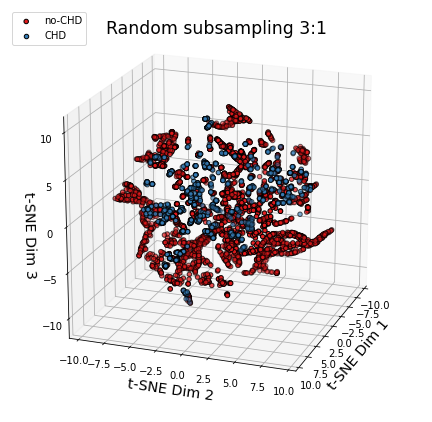

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_train],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Random subsampling 3:1",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('tSNE_RUS.png', dpi=100)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
#%% one-hot-encoding
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)

In [ ]:
#y_train.shape
#y_train
y_train_org

array([0, 0, 0, ..., 1, 1, 1])


# Running the part above is MANDATORY for training any Network below

## MLP only

In [ ]:
# MLP -2
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)


FC2 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)
outputs = keras.layers.Activation('softmax')(FC2)

myMLP = keras.Model(inputs=inputs,outputs=outputs)
myMLP.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 512)               26112     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
class_weight = {0: 1, 1: 10}

myMLP.fit(x_train,y_train,epochs=50,batch_size=500,verbose=1, class_weight=class_weight)

Epoch 1/50
11/11 [==============================] - 3s 37ms/step - loss: 0.4276 - accuracy: 0.8830
Epoch 2/50
11/11 [==============================] - 1s 45ms/step - loss: 0.0331 - accuracy: 0.9993
Epoch 3/50
11/11 [==============================] - 0s 38ms/step - loss: 0.0251 - accuracy: 0.9925
Epoch 4/50
11/11 [==============================] - 0s 32ms/step - loss: 0.0074 - accuracy: 0.9995
Epoch 5/50
11/11 [==============================] - 0s 38ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 6/50
11/11 [==============================] - 0s 35ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 7/50
11/11 [==============================] - 0s 39ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/50
11/11 [==============================] - 0s 38ms/step - loss: 6.8360e-04 - accuracy: 1.0000
Epoch 9/50
11/11 [==============================] - 0s 21ms/step - loss: 6.2395e-04 - accuracy: 1.0000
Epoch 10/50
11/11 [==============================] - 0s 22ms/step - loss: 3.3878e-04 - accuracy: 1.00

In [ ]:
test_loss,test_acc = myMLP.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 1s 2ms/step - loss: 5.3307e-04 - accuracy: 1.0000
1.0


In [ ]:
from sklearn import metrics
predlabel = myMLP.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3353    0]
 [   0  524]]


## MLP with additional layers

In [ ]:
# MLP -3 :: Input => Hidden(64) => Hidden(128) => Hidden(256)
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)

FC2    = keras.layers.Dense(256, bias_initializer=keras.initializers.VarianceScaling())(DP1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
#DP2    = keras.layers.Dropout(0.2)(AC2)


FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)
outputs = keras.layers.Activation('softmax')(FC3)

myMLP3 = keras.Model(inputs=inputs,outputs=outputs)
myMLP3.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape_1 (Reshape)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                3264      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
class_weight = {0: 1, 1: 2.2}

myMLP3.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 [==============================] - 3s 8ms/step - loss: 0.0778 - accuracy: 0.9826


In [ ]:
test_loss,test_acc = myMLP3.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9997
0.9997420907020569


In [ ]:
from sklearn import metrics
predlabel = myMLP3.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3352    1]
 [   0  524]]


# Introducing convolutional layers

## MLP+Conv :: Input => Hidden(128)  => Conv(4) => Output (2)

In [ ]:

inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((128,1))(DP0)
FC1    = keras.layers.Conv1D(4,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)
FL1   = keras.layers.Flatten()(Pool1)

FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)
outputs = keras.layers.Activation('softmax')(FC3)

myCNN1D1 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D1.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN1D1.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               6528      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                           

In [ ]:
class_weight = {0: 1, 1: 4}

myCNN1D1.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 [==============================] - 2s 6ms/step - loss: 0.3390 - accuracy: 0.9258


In [ ]:
test_loss,test_acc = myCNN1D1.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 1s 3ms/step - loss: 0.1404 - accuracy: 1.0000
1.0


In [ ]:
from sklearn import metrics
predlabel = myCNN1D1.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3353    0]
 [   0  524]]


##  MLP+CONV: Input => Hidden(128)  => Conv(4) => Conv(8) => Output (2)

In [ ]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((128,1))(DP0)
FC1    = keras.layers.Conv1D(4,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1 = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(8,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2 = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1   = keras.layers.Flatten()(Pool2)

FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)
outputs = keras.layers.Activation('softmax')(FC3)

myCNN1D2 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D2.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN1D2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape_4 (Reshape)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               6528      
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                           

In [ ]:
class_weight = {0: 1, 1: 4.5}

myCNN1D2.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 [==============================] - 3s 8ms/step - loss: 0.3248 - accuracy: 0.9378


In [ ]:
test_loss,test_acc = myCNN1D2.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 1s 3ms/step - loss: 0.2190 - accuracy: 0.8713
0.871292233467102


In [ ]:
from sklearn import metrics
predlabel = myCNN1D2.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3353    0]
 [ 499   25]]


## MLP+Conv :: Input => Hidden(64) => Conv(2) => Hidden(512)  

In [ ]:

inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(32, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((32,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)
FL1   = keras.layers.Flatten()(Pool1)

FC2    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
#DP2    = keras.layers.Dropout(0.2)(AC2)


FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)
outputs = keras.layers.Activation('softmax')(FC3)

myCNN1D3 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D3.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myCNN1D3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape_6 (Reshape)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                1632      
                                                                 
 batch_normalization_10 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 32)                0         
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                           

In [ ]:
class_weight = {0: 1, 1: 50}

myCNN1D3.fit(x_train,y_train,epochs=5,verbose=1, class_weight=class_weight)

Epoch 1/5
171/171 [==============================] - 2s 5ms/step - loss: 1.8141 - accuracy: 0.6237
Epoch 2/5
171/171 [==============================] - 1s 5ms/step - loss: 0.4486 - accuracy: 0.9042
Epoch 3/5
171/171 [==============================] - 1s 5ms/step - loss: 0.2391 - accuracy: 0.9523
Epoch 4/5
171/171 [==============================] - 1s 5ms/step - loss: 0.1171 - accuracy: 0.9786
Epoch 5/5
171/171 [==============================] - 1s 5ms/step - loss: 0.0691 - accuracy: 0.9887


In [ ]:
test_loss,test_acc = myCNN1D3.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9946
0.9945834279060364


In [ ]:
from sklearn import metrics
predlabel = myCNN1D3.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3332   21]
 [   0  524]]


## MLP+ CONV: Input => Dense(64) => Conv(2) => Conv(4) = Dense(512) => Dense (2) [Best model]

In [ ]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D4.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

#myCNN1D4.summary()

In [ ]:
class_weight = {0: 1, 1: 2.9}

myCNN1D4.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 [==============================] - 3s 7ms/step - loss: 0.2526 - accuracy: 0.9316


In [ ]:
test_loss,test_acc = myCNN1D4.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9634
0.9633737206459045


In [ ]:
from sklearn import metrics
predlabel = myCNN1D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3352    1]
 [ 141  383]]


In [ ]:
y_train @ np.transpose(np.array([0, 1]))
1/41

0.024390243902439025

## Input => Dense(64) => Conv(2) => Conv(4) = Conv(8) => Dense (2)

In [ ]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)


FC3    = keras.layers.Conv1D(6,7,strides=1)(Pool2)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
Pool3  = keras.layers.AveragePooling1D(pool_size=2)(AC3)




FL1    = keras.layers.Flatten()(Pool3)

#FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
#BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
#AC3    = keras.layers.Activation('relu')(BN3)
#DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(FL1)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN5D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN5D4.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN5D4.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape_10 (Reshape)        (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                3264      
                                                                 
 batch_normalization_17 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_23 (Activation)  (None, 64)                0         
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                           

In [ ]:
class_weight = {0: 1, 1: 3.0}

myCNN5D4.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 [==============================] - 3s 6ms/step - loss: 0.7978 - accuracy: 0.7524


In [ ]:
test_loss,test_acc = myCNN5D4.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 1s 3ms/step - loss: 0.3667 - accuracy: 0.8587
0.8586536049842834


In [ ]:
from sklearn import metrics
predlabel = myCNN5D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3302   51]
 [ 497   27]]


## Input => Dense(64) => Conv(2) => Dense (128) = Conv(4) => Dense (2)

In [ ]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FL0 = keras.layers.Flatten()(Pool1)

AA1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(FL0)
BB1 = keras.layers.BatchNormalization(axis=-1)(AA1)
CC1 = keras.layers.Activation('relu')(BB1)
Pool2 = keras.layers.Dropout(0.2)(CC1)


RS2    = keras.layers.Reshape((128,1))(Pool2)
FC2    = keras.layers.Conv1D(4,5,strides=1)(RS2)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool3  = keras.layers.AveragePooling1D(pool_size=2)(AC2)



FL1    = keras.layers.Flatten()(Pool3)

#FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
#BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
#AC3    = keras.layers.Activation('relu')(BN3)
#DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(FL1)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN5D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN5D4.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN5D4.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape_12 (Reshape)        (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                3264      
                                                                 
 batch_normalization_21 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 64)                0         
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                           

In [ ]:
class_weight = {0: 1, 1: 2.5}

myCNN5D4.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

171/171 [==============================] - 3s 8ms/step - loss: 0.3407 - accuracy: 0.9120


In [ ]:
test_loss,test_acc = myCNN5D4.evaluate(x_test,y_test)
print(test_acc)

122/122 [==============================] - 1s 3ms/step - loss: 0.1938 - accuracy: 0.9946
0.9945834279060364


In [ ]:
from sklearn import metrics
predlabel = myCNN5D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[3353    0]
 [  21  503]]


# Running SVM on the subsampled data

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svcCAD = SVC(C= 0.05, gamma=1/41, kernel='rbf', class_weight='balanced')
svcCAD.fit(x_train_org,y_train_org)
predlabel = svcCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)

[[3345    8]
 [   0  524]]


# Running random forest and adaboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
class_weight = {0: 1, 1: 3}
adaboostCAD = AdaBoostClassifier(n_estimators=1000, random_state=0)
adaboostCAD.fit(x_train_org,y_train_org)
predlabel = adaboostCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)

[[3353    0]
 [   0  524]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#randomforestCAD = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced_subsample')

parameters = {'n_estimators': (10,30,50,100,130,160,200), 'max_depth': (2, 3)}
randomforestCAD = GridSearchCV(RandomForestClassifier(random_state=0, class_weight='balanced_subsample'),
                               parameters, cv=5)



randomforestCAD.fit(x_train_org,y_train_org)
#predlabel = randomforestCAD.predict(x_test_org)
#confMat = metrics.confusion_matrix(y_test_org,predlabel)
#print(confMat)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=0),
             param_grid={'max_depth': (2, 3),
                         'n_estimators': (10, 30, 50, 100, 130, 160, 200)})

In [ ]:
print(randomforestCAD.cv_results_)
print(randomforestCAD.best_estimator_)

{'mean_fit_time': array([0.09575377, 0.26154385, 0.6171824 , 0.7035409 , 0.46502557,
       0.52822795, 0.65941415, 0.03647647, 0.10373206, 0.23944569,
       0.35001783, 0.45270348, 0.55996485, 0.88134422]), 'std_fit_time': array([0.02141969, 0.05058237, 0.27444192, 0.18370171, 0.06994261,
       0.00871314, 0.01471513, 0.00123936, 0.00274504, 0.08973045,
       0.00894873, 0.00460405, 0.00578538, 0.18334759]), 'mean_score_time': array([0.00657363, 0.01829376, 0.02893348, 0.05341449, 0.02398238,
       0.02841358, 0.03636308, 0.00307908, 0.00636191, 0.02330031,
       0.02036715, 0.02622008, 0.03140807, 0.04615784]), 'std_score_time': array([0.0029881 , 0.01223137, 0.01224813, 0.02865155, 0.00085699,
       0.00026234, 0.00262112, 0.00028161, 0.0001412 , 0.01579464,
       0.00210146, 0.00174483, 0.00363638, 0.01155269]), 'param_max_depth': masked_array(data=[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
             mask=[False, False, False, False, False, False, False, False,
         

# The following section shows the result when 70% of data are used for training

In [ ]:
# With train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reduced_data, opLabel, test_size = 0.3, random_state = 24)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#%% one-hot-encoding
Y_train = keras.utils.to_categorical(Y_train,2)
Y_test  = keras.utils.to_categorical(Y_test,2)

In [ ]:
# MLP -2
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)


FC2 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)
outputs = keras.layers.Activation('softmax')(FC2)

myMLP = keras.Model(inputs=inputs,outputs=outputs)
myMLP.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 reshape_15 (Reshape)        (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 512)               26112     
                                                                 
 batch_normalization_25 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 512)               0         
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
np.where(Y_train==0)[0].shape
np.where(Y_train==1)[0].shape


(6542,)

In [ ]:
class_weight = {0: 1, 1: 40}

myMLP.fit(X_train,Y_train,epochs=10,batch_size=1200,verbose=1, class_weight=class_weight)

Epoch 1/10
6/6 [==============================] - 1s 35ms/step - loss: 1.9376 - accuracy: 0.6842
Epoch 2/10
6/6 [==============================] - 0s 38ms/step - loss: 0.3387 - accuracy: 0.9032
Epoch 3/10
6/6 [==============================] - 0s 39ms/step - loss: 0.1644 - accuracy: 0.9778
Epoch 4/10
6/6 [==============================] - 0s 37ms/step - loss: 0.0734 - accuracy: 0.9989
Epoch 5/10
6/6 [==============================] - 0s 37ms/step - loss: 0.0489 - accuracy: 0.9998
Epoch 6/10
6/6 [==============================] - 0s 35ms/step - loss: 0.0315 - accuracy: 0.9998
Epoch 7/10
6/6 [==============================] - 0s 41ms/step - loss: 0.0215 - accuracy: 0.9998
Epoch 8/10
6/6 [==============================] - 0s 36ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 36ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 0s 36ms/step - loss: 0.0068 - accuracy: 0.9998


In [ ]:
test_loss,test_acc = myMLP.evaluate(X_test,Y_test)
print(test_acc)

88/88 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
1.0


In [ ]:
from sklearn import metrics
predlabel = myMLP.predict(X_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(Y_test,axis=1),f)
print(confMat)

[[2302    0]
 [   0  502]]


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs',max_iter=100000, 
                           class_weight= {0:1, 1:3.0}, verbose=1, random_state = 2)
model = clf.fit(x_train_org,y_train_org)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [ ]:
predlabel = model.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)

In [ ]:
print(confMat)

[[3353    0]
 [   0  524]]
